___
# Ciência dos Dados - PROJETO 3 - INSPER

___
## Alexandre Edington

## Bruno Cury

## Matheus Soares

___

___

## INTRODUÇÃO


Não vem de hoje o grande interesse da sociedade em vídeo games, porém, há aproximadamente dez anos atrás, a visão que tínhamos sobre o ato de jogar vídeo game e sua indústria era completamente diferente.
Em 2007 os jogos com maiores ambições comerciais projetavam um lucro multimilionário e a venda dos mesmos era feita através de discos que seriam rodados em seu console de preferência.
Hoje em dia os consoles são apenas uma parcela do vasto universo de aparelhos que rodam vídeo games, e a venda destes jogos já não se da mais por discos, sua grande maioria vem de downloads e seus lucros são projetados na faixa dos biliões de dólares. Os videogames são agora, onipresentes em nossas vidas, qualquer um com um smartphone tem acesso a uma variedade de jogos, disponíveis na plataforma de download do seu sistema operacional (iOS, Android, google play), ou até nas redes sociais como Facebook, que se tornou uma grande plataforma de jogos online. 
Com isso em mente, resolvemos analisar os dados da maior plataforma de download de vídeo games da internet, afim de quantificar o impacto dos jogos no mundo por meio da análise de suas características mais importantes. E então, a partir desta análise, predizer o sucesso (ou falta dele) na arrecadação mundial de algum jogo, através do input de algumas de suas características.

___
## MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

Os dados utilizados neste experimento foram retirados na integra do site data.world, onde são disponibilizados diversos bancos de dados; o Dataset escolhido é inteiramente referente às características dos jogos disponíveis na plataforma Steam. Inicialmente, o banco de dados em questão contava com mais de 70 variáveis e uma ampla quantidade de dados, porém o mesmo precisou ser filtrado, em prol da eficiência e organização foi feita a retirada de variáveis indesejadas e a retirada de dados nulos, pela referencia do gráfico de densidade, de onde tentamos tirar as variáveis com mais relação com nossa variavel de interesse, NUM_PROPRIETARIOS. Escolhemos também agrupar algumas variáveis, como a compatibilidade com Mac, Linux e Windows que se tornaram uma só entrada.Tanto número de proprietários quanto o preço inicial foram separados em faixas e adicionados a outras duas variáveis, respectivamente "FAIXA_VENDAS" e "QUALIFICACAO" para facilitar a análise. 

In [25]:
import pandas as pd
import os
from collections import Counter
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math as math
import statsmodels.api as sm
import seaborn as sns

In [26]:
df = pd.read_csv("games-features.csv",error_bad_lines=False,sep=";")

### BASE DE DADOS

O gráfico de densidade abaixo revelou que as variáveis do banco de dados não têm muita influência no número de proprietários (variável de interesse), exceto pelo número de recomendações que o jogo recebeu. Retiramos então, além do número de recomendações recebidas por jogo, as variáveis que, ao nosso olhar, se relacionavam melhor com nossa variável de interesse.

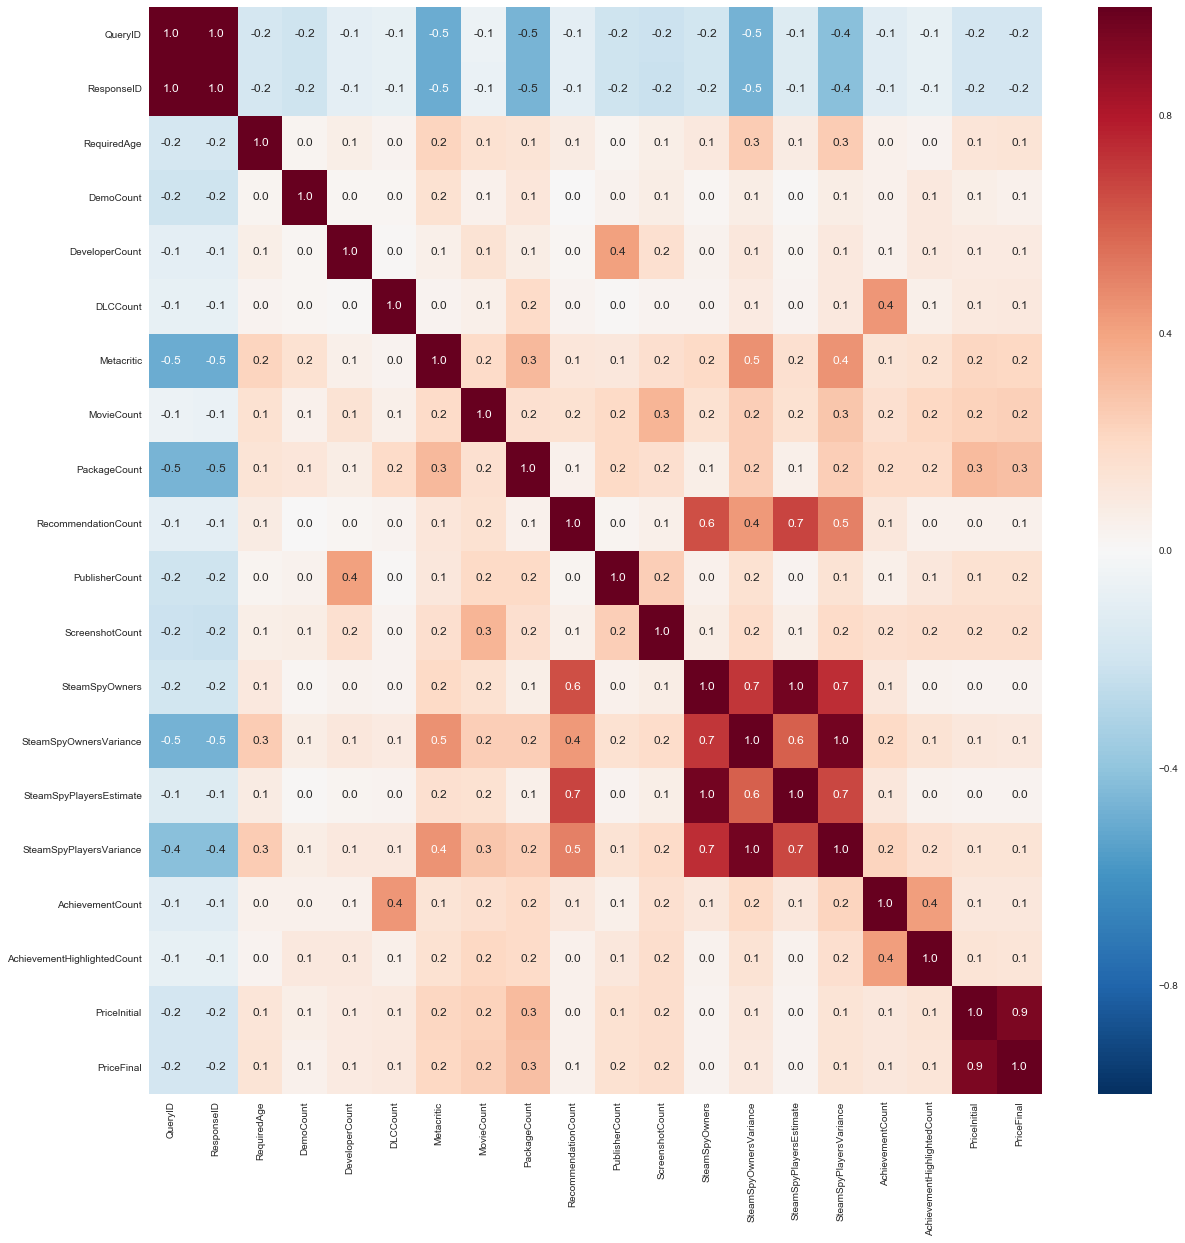

In [42]:
f,ax = plt.subplots(figsize = (20,20))
sns.heatmap(df.corr(),annot = True,fmt='.1f')

In [36]:
dados = pd.DataFrame()
dados["NOME"] = df["ResponseName"]
dados["LANCAMENTO"] = df["ReleaseDate"]
dados["ACHIEVEMENTS"] = df["AchievementCount"]
dados["LINGUAS"] = df["SupportedLanguages"]
dados["LINGUAS_N"] = df["SupportedLanguages"]
dados["INDIE"] = df["GenreIsIndie"]
dados["ACTION"] = df["GenreIsAction"]
dados["ADVENTURE"] = df["GenreIsAdventure"]
dados["CASUAL"] = df["GenreIsCasual"]
dados["STRATEGY"] = df["GenreIsStrategy"]
dados["RPG"] = df["GenreIsRPG"]
dados["SIMULATION"] = df["GenreIsSimulation"]
dados["SPORTS"] = df["GenreIsSports"]
dados["RACING"] = df["GenreIsRacing"]
dados["NUM_PROPRIETARIOS"] = df["SteamSpyOwners"]
dados["PRECO_INICIAL"] = df["PriceInitial"]
dados["PRECO_FINAL"] = df["PriceFinal"]
dados["N_RECOMENDACOES"] = df['RecommendationCount']

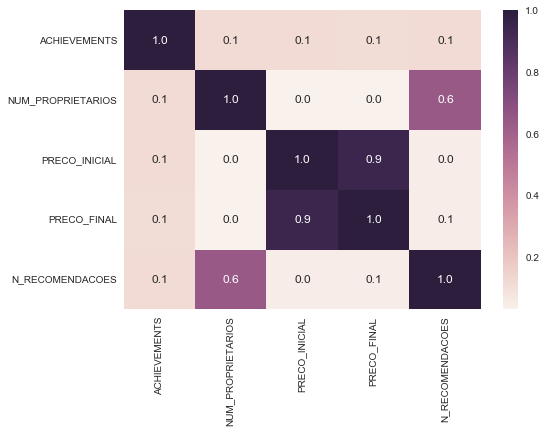

In [43]:
sns.heatmap(dados.corr(),annot = True,fmt='.1f')

In [4]:
remover=["with","full","audio","support","Traditional","Simplified"]

for i in range(len(dados)):
    tempa=dados.LINGUAS_N[i].split(" ")
    for a in remover:
        if a in tempa:
            tempa.remove(a)
    dados.LINGUAS_N[i]=len(tempa)

C:\Users\Bruno\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Analise Descritiva

A análise descritiva deste trabalho vem com o objetivo de evidenciar quais variáveis tem impacto na nossa variável de interesse 'NUM_PROPRIETARIOS'; e como realizamos algumas junções de variáveis é importante entender quais elementos dessas variáveis podem proporcionar tal impacto.

In [5]:
def Plataforma(df):
    a = df.PlatformWindows
    b = df.PlatformMac
    c = df.PlatformLinux
    
    if (a == "VERDADEIRO" and b == "VERDADEIRO" and c == "VERDADEIRO"): return "Windows Linux Mac"
    elif (a == "VERDADEIRO" and b == "VERDADEIRO" and c == "FALSO"): return "Windows Mac"
    elif (a == "VERDADEIRO" and b == "FALSO" and c == "FALSO"): return "Windows"
    elif (a == "FALSO" and b == "VERDADEIRO" and c == "VERDADEIRO"): return "Mac Linux"
    elif (a == "FALSO" and b == "VERDADEIRO" and c == "FALSO"): return "Mac"
    elif (a == "VERDADEIRO" and b == "FALSO" and c == "VERDADEIRO"): return "Windows Linux"
    elif (a == "FALSO" and b == "FALSO" and c == "VERDADEIRO"): return "Linux"
    else: return "Nenhuma Plataforma"

Input = df.apply(Plataforma,axis=1)
dados["PLATAFORMAS"] = Input


def Jogabilidade(df):
    a = df.CategoryMultiplayer
    b = df.CategorySinglePlayer
    c = df.CategoryCoop
    
    if (a == "VERDADEIRO" and b == "VERDADEIRO" and c == "VERDADEIRO"): return "MultiPlayer SinglePlayer Coop"
    elif (a == "VERDADEIRO" and b == "VERDADEIRO" and c == "FALSO"): return "MultiPlayer  SinglePlayer"
    elif (a == "VERDADEIRO" and b == "FALSO" and c == "FALSO"): return "MultiPlyer"
    elif (a == "FALSO" and b == "VERDADEIRO" and c == "VERDADEIRO"): return "SinglePlayer Coop"
    elif (a == "FALSO" and b == "VERDADEIRO" and c == "FALSO"): return "SinglePlayer"
    elif (a == "VERDADEIRO" and b == "FALSO" and c == "VERDADEIRO"): return "MultiPlayer Coop"
    elif (a == "FALSO" and b == "FALSO" and c == "VERDADEIRO"): return "Coop"
    else: return "Outra"
    
Input2 = df.apply(Jogabilidade,axis=1)
dados["JOGABILIDADE"] = Input2


dados.loc[(dados.PRECO_INICIAL < 499), "QUALIFICACAO"] = "A"
dados.loc[(dados.PRECO_INICIAL > 499) & (dados.PRECO_INICIAL <999), "QUALIFICACAO"] = "AA"
dados.loc[(dados.PRECO_INICIAL > 999), "QUALIFICACAO"] = "AAA"

dados.loc[(dados.NUM_PROPRIETARIOS < 25000), "FAIXA_VENDAS"] = "De 0 a 50 mil"
dados.loc[(dados.NUM_PROPRIETARIOS > 25000) & (dados.NUM_PROPRIETARIOS <50000), "FAIXA_VENDAS"] = "De 25 a 50 mil"
dados.loc[(dados.NUM_PROPRIETARIOS > 50000) & (dados.NUM_PROPRIETARIOS <100000), "FAIXA_VENDAS"] = "De 50 a 100 mil"
dados.loc[(dados.NUM_PROPRIETARIOS > 100000) & (dados.NUM_PROPRIETARIOS <500000), "FAIXA_VENDAS"] = "De 100 a 500 mil"
dados.loc[(dados.NUM_PROPRIETARIOS > 500000) & (dados.NUM_PROPRIETARIOS <1000000), "FAIXA_VENDAS"] = "De 500 mil a 1 milhão"
dados.loc[(dados.NUM_PROPRIETARIOS > 1000000) & (dados.NUM_PROPRIETARIOS <5000000), "FAIXA_VENDAS"] = "De 1 a 5 milhões"
dados.loc[(dados.NUM_PROPRIETARIOS > 5000000) & (dados.NUM_PROPRIETARIOS <10000000), "FAIXA_VENDAS"] = "De 5 a 10 milhões"
dados.loc[(dados.NUM_PROPRIETARIOS > 10000000) & (dados.NUM_PROPRIETARIOS <15000000), "FAIXA_VENDAS"] = "De 10 a 15 milhões"
dados.loc[(dados.NUM_PROPRIETARIOS > 20000000), "FAIXA_VENDAS"] = "mais de 20 milhões"

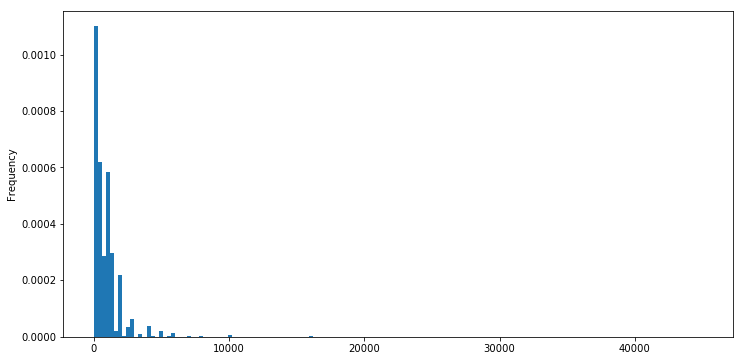

In [6]:
dados.PRECO_INICIAL.plot.hist(normed = 1, bins = 150,figsize = (12,6))

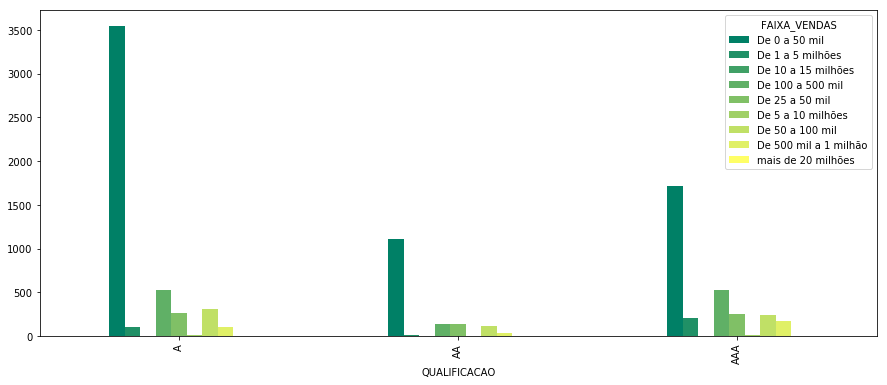

In [7]:
cross_qualificacao = pd.crosstab(dados.QUALIFICACAO,dados.FAIXA_VENDAS)
cross_qualificacao.plot(kind = "bar",figsize = (15,6),colormap = "summer")

No gráfico acima estão demonstrados os volumes de vendas nas categorias de preço 'A', 'AA' e 'AAA'. A categoria 'A' (com preços de venda até $4.99) demonstrou um grande volume de jogos com vendas até 50 mil copias, como era esperado de jogos mais simples com um orçamento menor, possui volume considerável também em jogos com vendas de 25 a 50 mil, 50 a 100 mil e 100 a 500 mil. A categoria 'AAA' também se comportou como esperado gerando jogos com um volume considerável nas faixas de 10 a 15 milhões de vendas, 1 a 5 milhões e mais de 20 milhões de vendas.

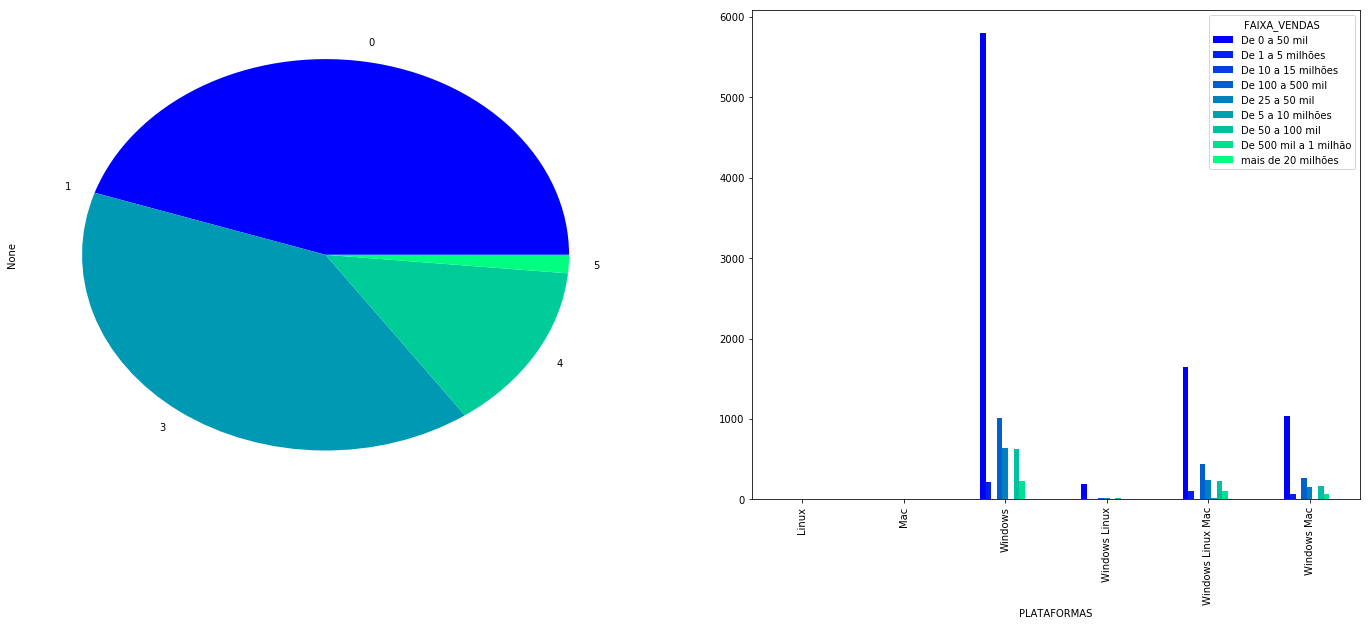

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2 )

Vendas_Windows = dados[dados.PLATAFORMAS == "Windows"].NUM_PROPRIETARIOS.sum()
Vendas_Mac = dados[dados.PLATAFORMAS == "Mac"].NUM_PROPRIETARIOS.sum()
Vendas_Linux = dados[dados.PLATAFORMAS == "Linux"].NUM_PROPRIETARIOS.sum()
Vendas_WLM = dados[dados.PLATAFORMAS == "Windows Linux Mac"].NUM_PROPRIETARIOS.sum()
Vendas_WM = dados[dados.PLATAFORMAS == "Windows Mac"].NUM_PROPRIETARIOS.sum()
Vendas_WL = dados[dados.PLATAFORMAS == "Windows Linux"].NUM_PROPRIETARIOS.sum()

l_Vendas_Plat = [Vendas_Windows,Vendas_Mac,Vendas_Linux,Vendas_WLM,Vendas_WM,Vendas_WL]
l_Vendas_Plat = pd.Series(l_Vendas_Plat)
l_Vendas_Plat.plot(kind = "pie",colormap = "winter",ax = axes[0],figsize = (24,9))

cross_plataformas = pd.crosstab(dados.PLATAFORMAS,dados.FAIXA_VENDAS)
cross_plataformas.plot(kind = "bar",colormap = "winter",ax = axes[1],figsize = (24,9))

No gráfico de pizza acima está representada a parcela que jogos que rodam nas plataformas de Mac, Linux e Windows tem no número total de proprietários de jogos. Os números no gráfico representam os índices da lista onde estão guardados os valores que representam a quantidade de proprietários de jogos naquela plataforma, eles são respectivamente 0 que representando as vendas de jogos que rodam exclusivamente em Windows, 1 representando as vendas de jogos que rodam exclusivamente em Mac's, 2 representando as vendas de jogos que rodam exclusivamente em Linux, 3 representando as vendas de jogos que rodam em Windows, Mac e Linux, 4 representando as vendas de jogos que rodam exclusivamente em Windows e Mac e 5 representando as vendas de jogos que rodam exclusivamente em Windows e Linux. As outras possíveis combinações não imprimem resultados numéricos significativos, por isso não estão representadas. A partir destes gráficos podemos concluir que os jogos para a plataforma Windows tem mais presença no número de proprietários e é seguido pelos jogos para as tres plataformas em conjunto em segundo lugar.  

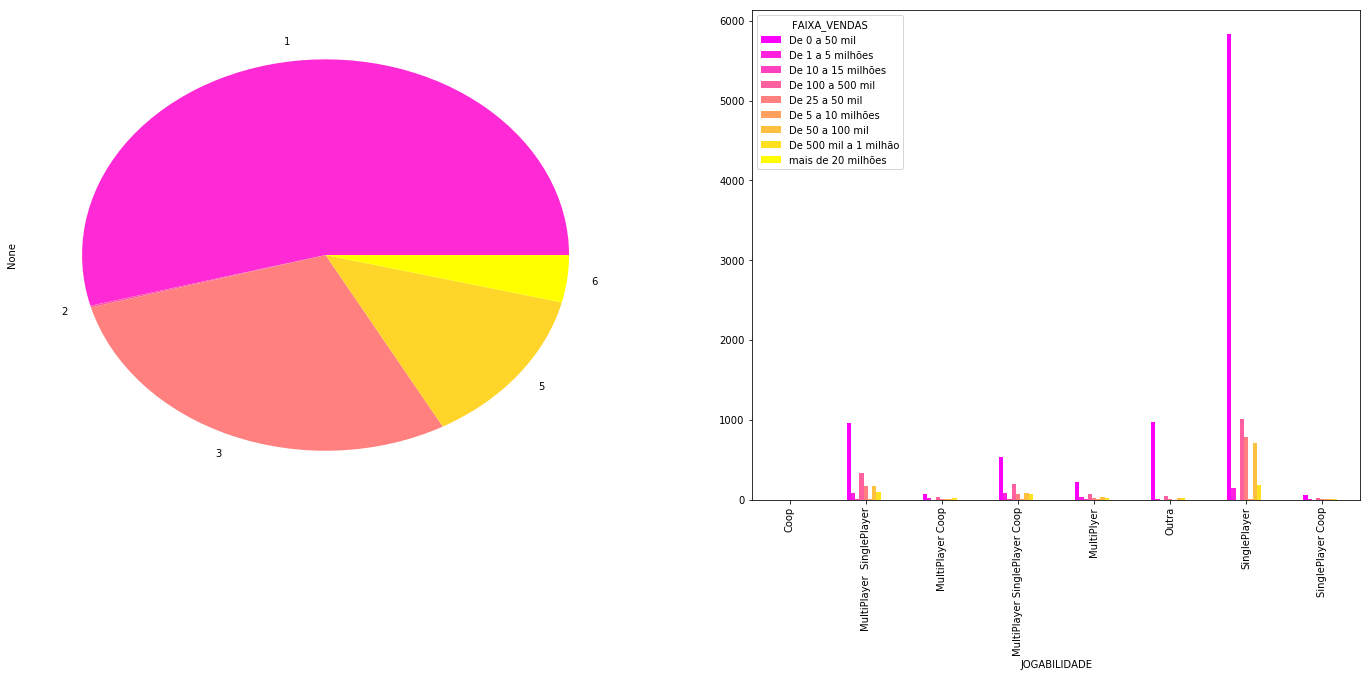

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2 )

Vendas_M = dados[dados.JOGABILIDADE == "MultiPlayer"].NUM_PROPRIETARIOS.sum()
Vendas_S = dados[dados.JOGABILIDADE == "SinglePlayer"].NUM_PROPRIETARIOS.sum()
Vendas_C = dados[dados.JOGABILIDADE == "Coop"].NUM_PROPRIETARIOS.sum()
Vendas_MSC = dados[dados.JOGABILIDADE == "MultiPlayer SinglePlayer Coop"].NUM_PROPRIETARIOS.sum()
Vendas_MS = dados[dados.JOGABILIDADE == "MultiPlayer SinglePlayer"].NUM_PROPRIETARIOS.sum()
Vendas_MC = dados[dados.JOGABILIDADE == "MultiPlayer Coop"].NUM_PROPRIETARIOS.sum()
Vendas_SC = dados[dados.JOGABILIDADE == "SinglePlayer Coop"].NUM_PROPRIETARIOS.sum()

l_Vendas_Jog = [Vendas_M,Vendas_S,Vendas_C,Vendas_MSC,Vendas_MS,Vendas_MC,Vendas_SC]
l_Vendas_Jog = pd.Series(l_Vendas_Jog)
l_Vendas_Jog.plot(kind = "pie",colormap = "spring",ax = axes[0],figsize = (3,3))

cross_jogabilidade = pd.crosstab(dados.JOGABILIDADE,dados.FAIXA_VENDAS)
cross_jogabilidade.plot(kind = "bar",colormap = "spring",ax = axes[1],figsize = (24,9))

Nos gráficos acima estamos avaliando qual modo de jogo ou combinação de modos de jogo tem maior impacto no número total de proprietários, os números no gráfico de pizza representam os índices da lista onde estão guardados os valores que representam a quantidade de proprietários nos jogos que possuem os modos de jogo em questão. O 1 representa os jogos que tem modos de jogo feitos exclusivamente para SinglePlayers, o 2 representa os jogos que tem modos de jogo feitos exclusivamente para Coop, 3 representa os jogos que tem modos de jogo feitos para MultiPlayer, SinglePlayer e Coop, 5 representa os jogos que tem modos de jogo feitos exclusivamente para Multiplayer e Coop e 6 representa os jogos que tem modos de jogo feitos exclusivamente para SignglePlayer e Coop. Os dois gráficos podem aparentar diferentes, porém, as faixas de vendas no gráfico de barras têm pesos diferentes umas das outras. 
Os jogos feitos exclusivamente para SinglePlayer, sem dúvida, apresentam maior número de vendas com mais de 50% do total de proprietários seguido pelos jogos que apresentam todos os modos de jogo.


In [10]:
indie = dados[dados.INDIE == "VERDADEIRO"].INDIE
action = dados[dados.ACTION == "VERDADEIRO"].ACTION
adventure = dados[dados.ADVENTURE == "VERDADEIRO"].ADVENTURE
casual = dados[dados.CASUAL == "VERDADEIRO"].CASUAL
strategy = dados[dados.STRATEGY == "VERDADEIRO"].STRATEGY
rpg = dados[dados.RPG == "VERDADEIRO"].RPG
simulation = dados[dados.SIMULATION == "VERDADEIRO"].SIMULATION
sports = dados[dados.SPORTS == "VERDADEIRO"].SPORTS
racing = dados[dados.RACING == "VERDADEIRO"].RACING


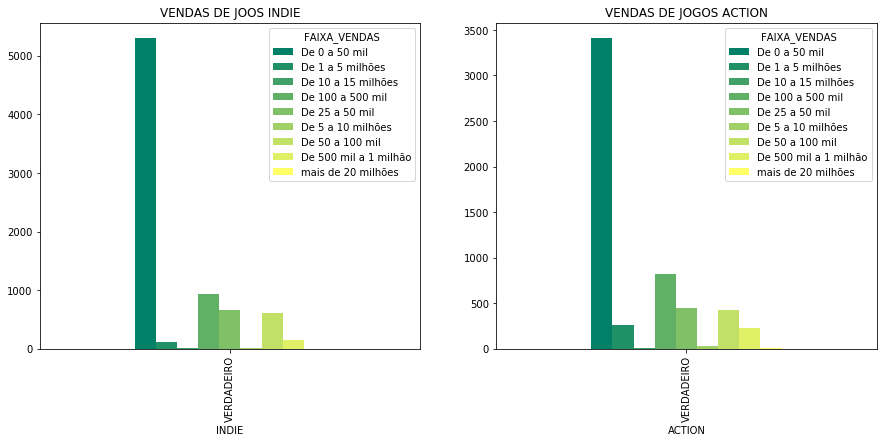

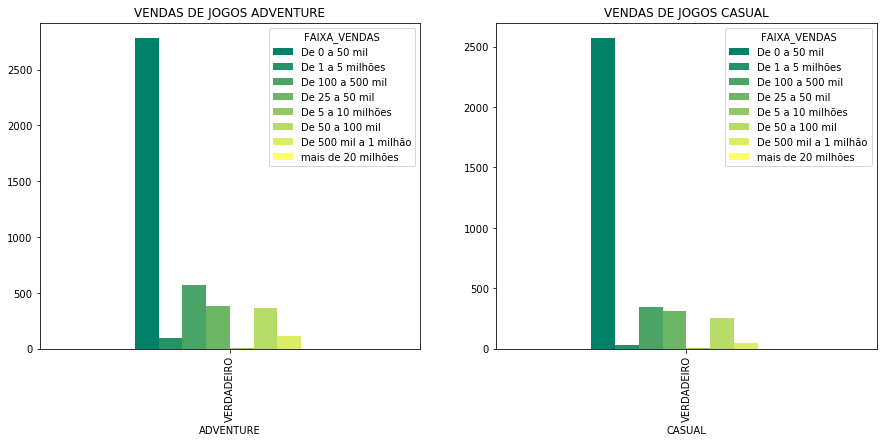

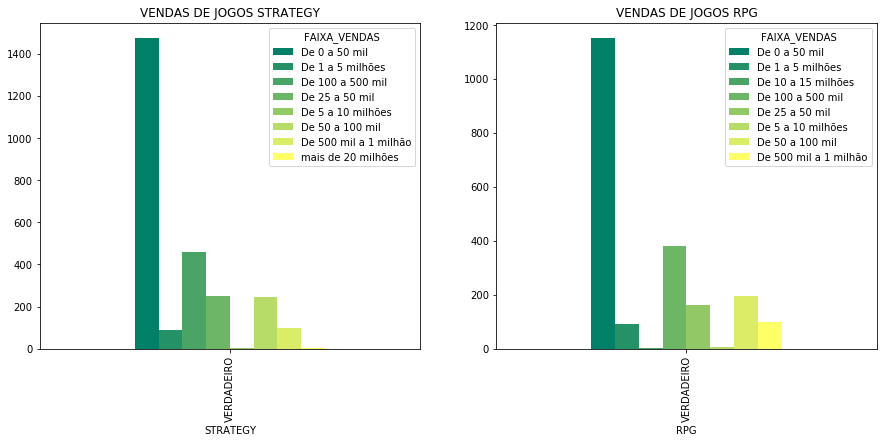

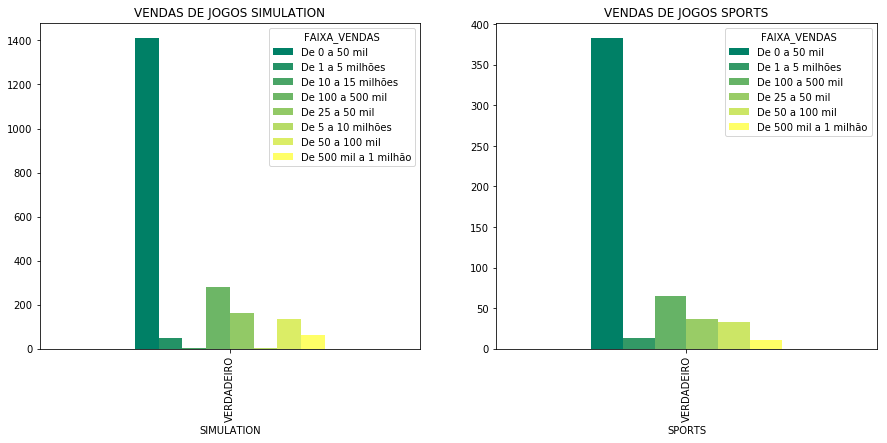

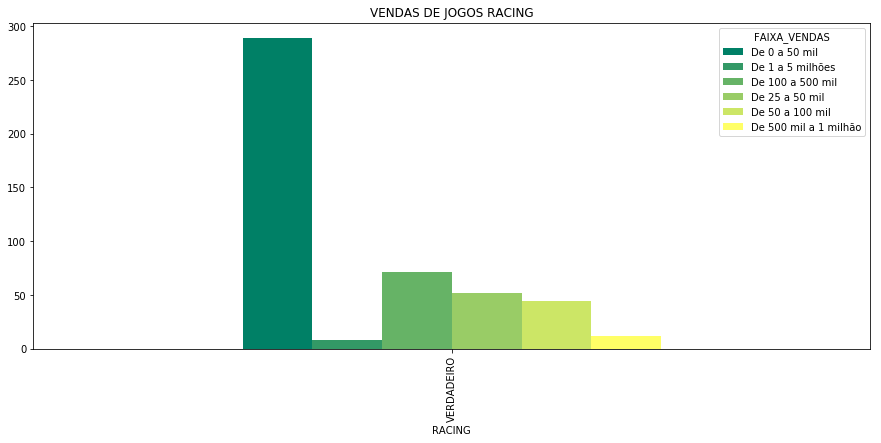

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2 )

pd.crosstab(indie,dados.FAIXA_VENDAS).plot(kind = 'bar',ax = axes[0],figsize = (15,6),colormap = 'summer',title = 'VENDAS DE JOOS INDIE')
pd.crosstab(action,dados.FAIXA_VENDAS).plot(kind = 'bar',ax = axes[1],figsize = (15,6),colormap = 'summer',title = 'VENDAS DE JOGOS ACTION')

fig, axes = plt.subplots(nrows=1, ncols=2 )

pd.crosstab(adventure,dados.FAIXA_VENDAS).plot(kind = 'bar',ax = axes[0],figsize = (15,6), colormap = 'summer',title = 'VENDAS DE JOGOS ADVENTURE')
pd.crosstab(casual,dados.FAIXA_VENDAS).plot(kind = 'bar',ax = axes[1],figsize = (15,6), colormap = 'summer',title = 'VENDAS DE JOGOS CASUAL')

fig, axes = plt.subplots(nrows=1, ncols=2 )

pd.crosstab(strategy,dados.FAIXA_VENDAS).plot(kind = 'bar',ax = axes[0],figsize = (15,6),colormap = 'summer',title = 'VENDAS DE JOGOS STRATEGY')
pd.crosstab(rpg,dados.FAIXA_VENDAS).plot(kind = 'bar',ax = axes[1],figsize = (15,6),colormap = 'summer',title = 'VENDAS DE JOGOS RPG')

fig, axes = plt.subplots(nrows=1, ncols=2 )

pd.crosstab(simulation,dados.FAIXA_VENDAS).plot(kind = 'bar',ax = axes[0],figsize = (15,6),colormap = 'summer',title = 'VENDAS DE JOGOS SIMULATION')
pd.crosstab(sports,dados.FAIXA_VENDAS).plot(kind = 'bar',ax = axes[1],figsize = (15,6),colormap = 'summer',title = 'VENDAS DE JOGOS SPORTS')
pd.crosstab(racing,dados.FAIXA_VENDAS).plot(kind = 'bar',figsize = (15,6),title = 'VENDAS DE JOGOS RACING',colormap = 'summer')

Nos gráficos acima tentamos mensurar qual gênero de jogo tem maior impacto no número total de proprietários, onde o gênero Action foi o que gerou a maioria das vendas seguido pelo gênero Indie, porém, deve ser levado em consideração que, um jogo pode ter mais de um gênero e Action parece ser mais presente do que os outros, talvez por englobar mais situações do que os outros, por exemplo; um jogo de RPG tem de ter ação, certo?


___
## MODELOS DE PREDIÇÃO

[O tópico C.PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO estará dentro deste tópico. Organize-o aqui de forma clara!]

[ORGANIZE AQUI TODOS OS MODELOS DE PREDIÇÃO NECESSÁRIOS NESTE PROJETO!]

o MODELO DE PREDIÇÃO PELA MÉDIA

o MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)

o MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)

o MODELO DE ÁRVORES DE REGRESSÃO (Decision Tree Regression)

In [24]:
#MODELO DE PREDICAO PELA MEDIA

y = dados.NUM_PROPRIETARIOS.mean()
f = dados.NUM_PROPRIETARIOS.mean()
yi = dados.NUM_PROPRIETARIOS
n = len(dados)


# coeficiente de determinação (R2) E raiz do erro médio quadrático (RMS).
def CoefDet(y,f,yi):
    
    num = ((yi-f)**2).sum()
    den = ((yi-y)**2).sum()
    R2 = 1 - (num/den)
    
    return[R2]

def RSM(y,f,yi):
    som = ((yi-y)**2).sum()
    rsm = ((1/n)*som)**0.5
    
    return[rsm]

#CoefDet(y,f,yi)
RSM(y,f,yi)

[1127193.4495076004]

In [37]:
dados

,NOME,LANCAMENTO,ACHIEVEMENTS,LINGUAS,LINGUAS_N,INDIE,ACTION,ADVENTURE,CASUAL,STRATEGY,RPG,SIMULATION,SPORTS,RACING,NUM_PROPRIETARIOS,PRECO_INICIAL,PRECO_FINAL,N_RECOMENDACOES
0,Counter-Strike,01/11/2000,0,English French German Italian Spanish Simplifi...,English French German Italian Spanish Simplifi...,FALSO,VERDADEIRO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,13033334,999,999,68991
1,Team Fortress Classic,01/04/1999,0,English French German Italian Spanish,English French German Italian Spanish,FALSO,VERDADEIRO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,5399140,499,499,2439
2,Day of Defeat,01/05/2003,0,English French German Italian Spanish,English French German Italian Spanish,FALSO,VERDADEIRO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,7621102,499,499,2319
3,Deathmatch Classic,01/06/2001,0,English French German Italian Spanish,English French German Italian Spanish,FALSO,VERDADEIRO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,7498965,499,499,888
4,Half-Life: Opposing Force,01/11/1999,0,English French German Korean,English French German Korean,FALSO,VERDADEIRO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,5399499,499,499,2934
5,Ricochet,01/11/2000,0,English French German Italian Spanish,English French German Italian Spanish,FALSO,VERDADEIRO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,7488563,499,499,1965
6,Half-Life,08/11/1998,0,English French German Italian Spanish Simplifi...,English French German Italian Spanish Simplifi...,FALSO,VERDADEIRO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,5927504,999,999,12486
7,Counter-Strike: Condition Zero,01/03/2004,0,English French German Italian Spanish Simplifi...,English French German Italian Spanish Simplifi...,FALSO,VERDADEIRO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,10489261,999,999,7067
8,Counter-Strike: Condition Zero,01/03/2004,0,English French German Italian Spanish Simplifi...,English French German Italian Spanish Simplifi...,FALSO,VERDADEIRO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,10489261,999,999,7067
9,Half-Life: Blue Shift,01/06/2001,0,English French German,English French German,FALSO,VERDADEIRO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,5368650,499,499,2219


Para realizar a regressão linear multipla teremos que transformar todos os generos em uma categoria só, numérica, para que se torne possivel a analise de regressão destas variaveis para com nossa variavel de interesse.

In [14]:
Vendas_INDIE = dados[dados.INDIE == "VERDADEIRO"].NUM_PROPRIETARIOS.sum()
Vendas_ACTION = dados[dados.ACTION == "VERDADEIRO"].NUM_PROPRIETARIOS.sum()
Vendas_ADVENTURE = dados[dados.ADVENTURE == "VERDADEIRO"].NUM_PROPRIETARIOS.sum()
Vendas_CASUAL = dados[dados.CASUAL == "VERDADEIRO"].NUM_PROPRIETARIOS.sum()
Vendas_STRATEGY = dados[dados.STRATEGY == "VERDADEIRO"].NUM_PROPRIETARIOS.sum()
Vendas_SIMULATION = dados[dados.SIMULATION == "VERDADEIRO"].NUM_PROPRIETARIOS.sum()
Vendas_SPORTS = dados[dados.SPORTS == "VERDADEIRO"].NUM_PROPRIETARIOS.sum()
Vendas_RACING = dados[dados.RACING == "VERDADEIRO"].NUM_PROPRIETARIOS.sum()
Vendas_RPG = dados[dados.RPG == "VERDADEIRO"].NUM_PROPRIETARIOS.sum()


L_VendasGenero = [Vendas_INDIE,Vendas_ACTION,Vendas_ADVENTURE,Vendas_CASUAL,Vendas_STRATEGY,Vendas_SIMULATION,Vendas_SPORTS,Vendas_RACING,Vendas_RPG]
L_VendasGenero = pd.Series(L_VendasGenero)

total = L_VendasGenero.sum()

P_INDIE = Vendas_INDIE/total
P_ACTION = Vendas_ACTION/total
P_ADVENTURE = Vendas_ADVENTURE/total
P_CASUAL = Vendas_CASUAL/total
P_STRATEGY = Vendas_STRATEGY/total
P_SIMULATION = Vendas_SIMULATION/total
P_SPORTS = Vendas_SPORTS/total
P_RACING = Vendas_RACING/total
P_RPG = Vendas_RPG/total


print("O total de vendas de INDIE sobre o total de todos os generos =  ",P_INDIE*1000)
print("O total de vendas de ACTION sobre o total de todos os generos =  ",P_ACTION*1000)
print("O total de vendas de ADVENTURE sobre o total de todos os generos =  ",P_ADVENTURE*1000)
print("O total de vendas de CASUAL sobre o total de todos os generos =  ",P_CASUAL*1000)
print("O total de vendas de STRATEGY sobre o total de todos os generos =  ",P_STRATEGY*1000)
print("O total de vendas de SIMULATION sobre o total de todos os generos =  ",P_SIMULATION*1000)
print("O total de vendas de SPORTS sobre o total de todos os generos =  ",P_SPORTS*1000)
print("O total de vendas de RACING sobre o total de todos os generos =  ",P_RACING*1000)
print("O total de vendas de RPG sobre o total de todos os generos =  ",P_RPG*1000)
print(total*1000)

O total de vendas de INDIE sobre o total de todos os generos =   13304.04903736572
O total de vendas de ACTION sobre o total de todos os generos =   27517.58796932415
O total de vendas de ADVENTURE sobre o total de todos os generos =   10018.977980502323
O total de vendas de CASUAL sobre o total de todos os generos =   4369.2333032347115
O total de vendas de STRATEGY sobre o total de todos os generos =   8603.387492414084
O total de vendas de SIMULATION sobre o total de todos os generos =   4983.228485514304
O total de vendas de SPORTS sobre o total de todos os generos =   1076.0308147196674
O total de vendas de RACING sobre o total de todos os generos =   920.9354559970327
O total de vendas de RPG sobre o total de todos os generos =   8357.824861684872
54957112000


In [15]:
def NumGen(dados):
    a = dados.INDIE
    b = dados.ACTION
    c = dados.ADVENTURE
    d = dados.CASUAL
    e = dados.STRATEGY
    f = dados.SIMULATION
    g = dados.SPORTS
    h = dados.RACING
    i = dados.RPG
    if a == "VERDADEIRO" : return 13304
    elif b == "VERDADEIRO" : return 27517
    elif c == "VERDADEIRO" : return 10018
    elif d == "VERDADEIRO" : return 4370
    elif e == "VERDADEIRO" : return 8603
    elif f == "VERDADEIRO" : return 4983
    elif g == "VERDADEIRO" : return 1076
    elif h == "VERDADEIRO" : return 920
    elif i == "VERDADEIRO" : return 8357

Genero_Numerado = dados.apply(NumGen,axis=1)
dados["PESO_GENEROS"] = Genero_Numerado


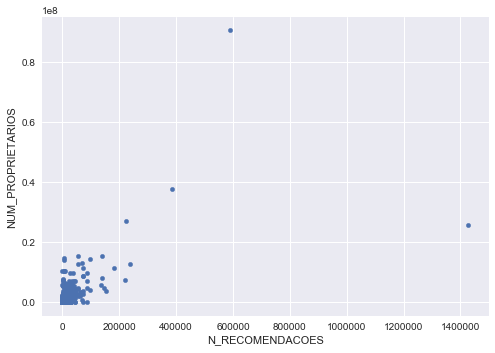

In [38]:
dados.plot.scatter('N_RECOMENDACOES','NUM_PROPRIETARIOS')

In [41]:
#REGRESSÃO LINEAR MULTIPLA

expl = dados["N_RECOMENDACOES","PRECO_INICIAL"].dropna()
alvo = dados["NUM_PROPRIETARIOS"].dropna()

X = expl["PESO_GENEROS","PRECO_INICIAL"]
y = alvo["NUM_PROPRIETARIOS"]

modelo = sm.OLS(y, X).fit() 
predicao = model.predict(X)
modelo.summary()

KeyError: ('N_RECOMENDACOES', 'PRECO_INICIAL')

___
## CONCLUSÃO

___
## REFERÊNCIAS BIBLIOGRÁFICAS